In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from sglm.models import sglm_cv


In [22]:
import itertools

# group_1_mice = ['WT62', 'WT63', 'WT64', 'WT65']
# group_1_sess = ['11082021', '11102021', '11122021', '11182021']
# group_1_combo = ['_'.join(_) for _ in list(itertools.product(group_1_mice, group_1_sess))]

# group_2_mice = ['WT66', 'WT67', 'WT68', 'WT69']
# group_2_sess = ['12132021', '12152021', '12172021', '12192021']
# group_2_combo = ['_'.join(_) for _ in list(itertools.product(group_2_mice, group_2_sess))]

# group_3_mice = ['WT57', 'WT58', 'WT59', 'WT60', 'WT61']
# group_3_sess = ['10042021', '10062021', '10082021', '10112021', '10132021', '10152021']
# group_3_combo = ['_'.join(_) for _ in list(itertools.product(group_3_mice, group_3_sess))]

# group_4_mice = ['WT53', 'WT54', 'WT55', 'WT56']
# group_4_sess = ['09012021', '09032021', '09062021']
# group_4_combo = ['_'.join(_) for _ in list(itertools.product(group_4_mice, group_4_sess))]

# fig_1_signal_files_setup = group_1_combo + group_2_combo + group_3_combo + group_4_combo
# signal_files = []
# for f in fig_1_signal_files_setup:
#     signal_files += glob.glob(f'../../data/raw/GLM_SIGNALS_{f}*')

In [23]:

import time
import glob
import numpy as np
import pandas as pd
import numpy as np
from sglm.features import gen_signal_df as gsd
from sglm.features import build_features as bf
from sglm.features import setup_model_fit as smf
from sglm.models import sglm_cv
from sglm import models
from sglm.visualization import visualize
from sglm.models import train_model
from sglm.models import eval
from sglm import features

neg_order = -20
pos_order = 20

# multifile_fit = 'single' #False
multifile_fit = 'all' #True
# multifile_fit = 'by_mouse'

# prefix = 'combo-616364v-02'
# prefix = 'combo-616364-v04-addl-ys2'
# prefix = 'combo-616364-v05-words'
# prefix = 'combo-616364-v06-words-fixed-spnrOff'
# prefix = 'combo-dropcpx-v01'
# prefix = 'combo-dropcpx-v02-cpnReconstruct'
# prefix = 'combo-cpnOnly'
# prefix = 'combo-cpn-spnOnly-20'
# prefix = 'combo-cpn-spnOnly-30'
# prefix = 'combo-cpn-spnOnly-20c'
# prefix = 'combo-cpn-spnOnly-20d'
# prefix = 'combo-cpn-spnOnly-20e'
# prefix = 'combo-cpn-spnOnly-20f'
# prefix = 'combo-cpn-spnOnly-20g'
# prefix = 'combo-cpn-spnOnly-20h'
# prefix = 'combo-cpn-spnOnly-20i'
# prefix = 'combo-cpn-spnOnly-20j'
# prefix = 'combo-cpn-spnOnly-20k'
# prefix = 'combo-base-plus-off'
# prefix = 'combo-base-plus-off-byfile'
# prefix = 'fig1-fits-combo'
# prefix = 'fig1-fits-combo-updateFiles-v01'
# prefix = 'fig1-fits-combo-updateFiles-wSO-v01'
# prefix = 'fig1-fcuFSO-v02'
# prefix = 'fig1-fcuFSO-v02-by-mouse'
# prefix = 'fig1-fcuFSO-v02-by-mousesess'
# prefix = 'all-fix-fig1-v01'
# prefix = 'SOcollapse-all-fix-fig1-v01'
# prefix = f'{multifile_fit}-csv-coeffs'
prefix = f'{multifile_fit}-csv-coeffs-words'

# wt_used = ['WT61', 'WT63', 'WT64']
# wt_used = ['WT61', 'WT63', 'WT64']
wt_used = ['WT62', 'WT63', 'WT64', 'WT65', 'WT66', 'WT67', 'WT68', 'WT69', 'WT57', 'WT58', 'WT59', 'WT60', 'WT61', 'WT53', 'WT54', 'WT55', 'WT56']


# X_y_pairings = [
#     {'X_cols': {'nTrial': (0,0),
#                 'cpn': (0,0),
#                 'cpx': (0,0),
#                 'spnr': (0,0),
#                 'spxr': (0,0),
#                 'spnnr': (0,0),
#                 'spxnr': (0,0),
#                 'sl': (0,0),
#                 # 'Ch6': (0,0)
#                },
#      'y_col': 'gACH'},
#     {'X_cols': {'nTrial': (0,0),
#                 'cpn': (0,0),
#                 'cpx': (0,0),
#                 'spnr': (0,0),
#                 'spxr': (0,0),
#                 'spnnr': (0,0),
#                 'spxnr': (0,0),
#                 'sl': (0,0),
#                 # 'Ch6': (0,0)
#                },
#      'y_col': 'gDA'},
#     {'X_cols': {'nTrial': (0,0),
#                 'cpn': (0,0),
#                 'cpx': (0,0),
#                 'spnr': (0,0),
#                 'spxr': (0,0),
#                 'spnnr': (0,0),
#                 'spxnr': (0,0),
#                 'sl': (0,0),
#                 # 'Ch6': (0,0)
#                },
#      'y_col': 'Ch5'},
#     {'X_cols': {'nTrial': (0,0),
#                 'cpn': (0,0),
#                 'cpx': (0,0),
#                 'spnr': (0,0),
#                 'spxr': (0,0),
#                 'spnnr': (0,0),
#                 'spxnr': (0,0),
#                 'sl': (0,0),
#                 # 'Ch5': (0,0)
#                },
#      'y_col': 'Ch6'},
# ]




X_y_pairings = [
    {'X_cols': {
                #'nTrial': (0,1),
                # 'cpn': (0,0),
                # 'cpn': (0,0),
                # # 'cpx': (0,0),
                # 'spnr': (0,0),
                # 'spnr': (0,0),
                # 'spxr': (0,0),
                # 'spnnr': (0,0),
                # 'spnnr': (0,0),
                # 'spxnr': (0,0),

                # 'spnrOff': (0,0),


                'photometryCenterInIndex':(0,0), #'photometryCenterOutIndex':(0,0),
                'sl': (0,0),
                'photometrySideInIndexr':(0,0), 'photometrySideInIndexnr':(0,0),
                # 'photometrySideOutIndexr':(0,0), 'photometrySideOutIndexnr':(0,0),
                'photometrySideOutIndex':(0,0),

                # # # 'photometrySideInIndexAA':(0,0), 'photometrySideInIndexAa':(0,0),
                # # # 'photometrySideInIndexaA':(0,0), 'photometrySideInIndexaa':(0,0),
                # # # 'photometrySideInIndexAB':(0,0), 'photometrySideInIndexAb':(0,0),
                # # # 'photometrySideInIndexaB':(0,0), 'photometrySideInIndexab':(0,0),

                # # # 'photometrySideOutIndexAA':(0,0), 'photometrySideOutIndexAa':(0,0),
                # # # 'photometrySideOutIndexaA':(0,0), 'photometrySideOutIndexaa':(0,0),
                # # # 'photometrySideOutIndexAB':(0,0), 'photometrySideOutIndexAb':(0,0),
                # # # 'photometrySideOutIndexaB':(0,0), 'photometrySideOutIndexab':(0,0),

                # # # 'Ch6': (0,0)

                'spnnrOff': (0,0),
               },
     'y_col': 'gACH'},
    {'X_cols': {
                #'nTrial': (0,1),
                # 'cpn': (0,0),
                # 'cpn': (0,0),
                # # 'cpx': (0,0),
                # 'spnr': (0,0),
                # 'spnr': (0,0),
                # 'spxr': (0,0),
                # 'spnnr': (0,0),
                # 'spnnr': (0,0),
                # 'spxnr': (0,0),

                # 'spnrOff': (0,0),


                'photometryCenterInIndex':(0,0), #'photometryCenterOutIndex':(0,0),
                'sl': (0,0),
                'photometrySideInIndexr':(0,0), 'photometrySideInIndexnr':(0,0),
                # 'photometrySideOutIndexr':(0,0), 'photometrySideOutIndexnr':(0,0),
                'photometrySideOutIndex':(0,0),

                # # # 'photometrySideInIndexAA':(0,0), 'photometrySideInIndexAa':(0,0),
                # # # 'photometrySideInIndexaA':(0,0), 'photometrySideInIndexaa':(0,0),
                # # # 'photometrySideInIndexAB':(0,0), 'photometrySideInIndexAb':(0,0),
                # # # 'photometrySideInIndexaB':(0,0), 'photometrySideInIndexab':(0,0),

                # # # 'photometrySideOutIndexAA':(0,0), 'photometrySideOutIndexAa':(0,0),
                # # # 'photometrySideOutIndexaA':(0,0), 'photometrySideOutIndexaa':(0,0),
                # # # 'photometrySideOutIndexAB':(0,0), 'photometrySideOutIndexAb':(0,0),
                # # # 'photometrySideOutIndexaB':(0,0), 'photometrySideOutIndexab':(0,0),

                # # # 'Ch6': (0,0)

                'spnnrOff': (0,0),
               },
     'y_col': 'gDA'},
    # {'X_cols': {
    #             #'nTrial': (0,1),
    #             # 'cpn': (0,0),
    #             # 'cpn': (0,0),
    #             # # 'cpx': (0,0),
    #             # 'spnr': (0,0),
    #             # 'spnr': (0,0),
    #             # 'spxr': (0,0),
    #             # 'spnnr': (0,0),
    #             # 'spnnr': (0,0),
    #             # 'spxnr': (0,0),

    #             # 'spnrOff': (0,0),


    #             'photometryCenterInIndex':(0,0), #'photometryCenterOutIndex':(0,0),
    #             'sl': (0,0),
    #             'photometrySideInIndexr':(0,0), 'photometrySideInIndexnr':(0,0),
    #             # # 'photometrySideOutIndexr':(0,0), 'photometrySideOutIndexnr':(0,0),

    #             # # # 'photometrySideInIndexAA':(0,0), 'photometrySideInIndexAa':(0,0),
    #             # # # 'photometrySideInIndexaA':(0,0), 'photometrySideInIndexaa':(0,0),
    #             # # # 'photometrySideInIndexAB':(0,0), 'photometrySideInIndexAb':(0,0),
    #             # # # 'photometrySideInIndexaB':(0,0), 'photometrySideInIndexab':(0,0),

    #             # # # 'photometrySideOutIndexAA':(0,0), 'photometrySideOutIndexAa':(0,0),
    #             # # # 'photometrySideOutIndexaA':(0,0), 'photometrySideOutIndexaa':(0,0),
    #             # # # 'photometrySideOutIndexAB':(0,0), 'photometrySideOutIndexAb':(0,0),
    #             # # # 'photometrySideOutIndexaB':(0,0), 'photometrySideOutIndexab':(0,0),

    #             # # # 'Ch6': (0,0)

    #             'spnnrOff': (0,0),
    #            },
    #  'y_col': 'Ch5'},
    # {'X_cols': {
    #             #'nTrial': (0,1),
    #             # 'cpn': (0,0),
    #             # 'cpn': (0,0),
    #             # # 'cpx': (0,0),
    #             # 'spnr': (0,0),
    #             # 'spnr': (0,0),
    #             # 'spxr': (0,0),
    #             # 'spnnr': (0,0),
    #             # 'spnnr': (0,0),
    #             # 'spxnr': (0,0),

    #             # 'spnrOff': (0,0),


    #             'photometryCenterInIndex':(0,0), #'photometryCenterOutIndex':(0,0),
    #             'sl': (0,0),
    #             'photometrySideInIndexr':(0,0), 'photometrySideInIndexnr':(0,0),
    #             # # 'photometrySideOutIndexr':(0,0), 'photometrySideOutIndexnr':(0,0),

    #             # # # 'photometrySideInIndexAA':(0,0), 'photometrySideInIndexAa':(0,0),
    #             # # # 'photometrySideInIndexaA':(0,0), 'photometrySideInIndexaa':(0,0),
    #             # # # 'photometrySideInIndexAB':(0,0), 'photometrySideInIndexAb':(0,0),
    #             # # # 'photometrySideInIndexaB':(0,0), 'photometrySideInIndexab':(0,0),

    #             # # # 'photometrySideOutIndexAA':(0,0), 'photometrySideOutIndexAa':(0,0),
    #             # # # 'photometrySideOutIndexaA':(0,0), 'photometrySideOutIndexaa':(0,0),
    #             # # # 'photometrySideOutIndexAB':(0,0), 'photometrySideOutIndexAb':(0,0),
    #             # # # 'photometrySideOutIndexaB':(0,0), 'photometrySideOutIndexab':(0,0),

    #             # # # 'Ch6': (0,0)

    #             'spnnrOff': (0,0),
    #            },
    #  'y_col': 'Ch6'},
]

widest_orders = smf.xy_pairs_to_widest_orders(X_y_pairings)
widest_orders = smf.X_cols_dict_to_default(widest_orders, neg_order, pos_order)


# Load Signal Data
signal_files = []
for wt in wt_used:
    signal_files += glob.glob(f'../../data/interim/GLM_SIGNALS_INTERIM_{wt}_*')
    
if multifile_fit == 'all':
    combo_dfs, X_cols_sftd, _ = smf.multi_file_analysis_prep(signal_files, widest_orders,)
    combo_fns = ['_'.join(wt_used).replace('WT', '')]
elif multifile_fit == 'by_mouse':
    combo_dfs = []
    X_cols_sftd_lst = []
    combo_fns = []
    for mouse_id in wt_used:
        mouse_id_files = [_ for _ in signal_files if mouse_id in _]
        print('mouse_id', mouse_id)
        combo_dfs_tmp, X_cols_sftd_tmp, _ = smf.multi_file_analysis_prep(mouse_id_files, widest_orders,)
        combo_dfs += combo_dfs_tmp
        X_cols_sftd_lst.append(X_cols_sftd_tmp)
        combo_fns.append(mouse_id)

    for xcsl in X_cols_sftd_lst:
        if xcsl != X_cols_sftd_lst[0]:
            raise ValueError('X_cols_sftd_lst should contain the same elements for every entry')
    
    X_cols_sftd = X_cols_sftd_lst[0]

elif multifile_fit == 'single':
    combo_dfs, X_cols_sftd, combo_fns = smf.single_file_analysis_prep(signal_files, widest_orders,)
else:
    raise ValueError('multifile_fit must be "all", "single", or "by_mouse"')

In [24]:
assert(len(combo_fns) == len(combo_dfs))
len(combo_dfs), list(zip(combo_fns, [_.columns[:5] for _ in combo_dfs]))

(1,
 [('62_63_64_65_66_67_68_69_57_58_59_60_61_53_54_55_56',
   Index(['gDA', 'Ch2', 'Ch5', 'Ch6', 'cpo'], dtype='object'))])

In [25]:
# def X_cols_dict_to_default(X_cols_dict, neg_order=-20, pos_order=20):
#     X_cols_dict = X_cols_dict.copy()
#     for X_col in X_cols_dict:
#         if X_cols_dict[X_col] == (0,0) or X_cols_dict[X_col] is None:
#             X_cols_dict[X_col] = (neg_order, pos_order)
#     return X_cols_dict

# X_cols_dict = {
#     'Ch5': (-5, 5),
#     'Ch6': (-5, 10),
#     'GP_1': (-10, 5),
#     'GP_2': (-5, 0),
#     'GP_5': (0, 0),
# }
# X_cols_dict = X_cols_dict_to_default(X_cols_dict, neg_order, pos_order)
# smf.timeshift_vals_by_dict(combo_dfs[0][['gACH',	'rDA',	'Ch5',	'Ch6',	'GP_1',	'GP_2',	'GP_5',	'GP_6',	'SGP_1',	'SGP_2']], X_cols_dict).columns

In [26]:
all_coeff_dfs = []

In [27]:
# y_col_lst = ['gACH', 'gDA', 'Ch5', 'Ch6']

drop_cols_basis = [
    'nTrial',
    'cpn', 'cpx',
    'spnnr',
    'spxnr',
    'spnr', 'spxr',


    'photometrySideInIndexAA', 'photometrySideInIndexAa',
    'photometrySideInIndexaA', 'photometrySideInIndexaa',
    'photometrySideInIndexAB', 'photometrySideInIndexAb',
    'photometrySideInIndexaB', 'photometrySideInIndexab',

    'photometrySideOutIndexAA', 'photometrySideOutIndexAa',
    'photometrySideOutIndexaA', 'photometrySideOutIndexaa',
    'photometrySideOutIndexAB', 'photometrySideOutIndexAb',
    'photometrySideOutIndexaB', 'photometrySideOutIndexab',
    
    'sl',
]

ssave_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/models/ssave'
all_models_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/models/all_models'
all_data_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/models/all_data'
all_reconstruct_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/figures/all_reconstruct'
all_coeffs_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/figures/all_coeffs'
best_reconstruct_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/figures/best_reconstruct'
best_coeffs_npy_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_coeffs'
best_combined_coeffs_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs'
best_coeffs_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/figures/best_coeffs'

all_models_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/models'

avg_reconstruct_basename = 'arr'
all_betas_basename = 'betas'
model_c_basename = 'coeffs'
model_i_basename = 'intercept'
tmp_data_basename = 'tmp_data'



score_method = 'r2'

# Select hyper parameters for GLM to use for model selection
# Step 1: Create a dictionary of lists for these relevant keywords...
kwargs_iterations = {
    'alpha': [0],
    'l1_ratio': [0],

    # 'alpha': [0.0, 0.001, 0.01, 0.1, 1.0],
    # 'l1_ratio': [0.0, 0.001],
}

# Step 2: Create a dictionary for the fixed keyword arguments that do not require iteration...
kwargs_fixed = {
    'max_iter': 1000,
    'fit_intercept': False
}

# neg_order, pos_order = -14, 14
folds = 50
pholdout = 0.2
pgss = 0.2

# Step 3: Generate iterable list of keyword sets for possible combinations
glm_kwarg_lst = sglm_cv.generate_mult_params(kwargs_iterations, kwargs_fixed)


In [28]:
# X_cols_basis = X_y_dct['X_cols']
# y_col = X_y_dct['y_col']
# fn = signal_fn.split('.')[0].split('/')[-1]
# run_id = f'{prefix}_{fn}_{y_col}_{iXyd}'

# X_cols_sftd_basis = bf.col_shift_bounds_dict_to_col_list(X_cols_basis, X_cols_sftd)
# dfrel


FINAL_62_63_64_65_66_67_68_69_57_58_59_60_61_53_54_55_56.csv
> Included animals for y_col gACH: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
X_setup.columns: Index(['photometryCenterInIndex_-20', 'photometryCenterInIndex_-19',
       'photometryCenterInIndex_-18', 'photometryCenterInIndex_-17',
       'photometryCenterInIndex_-16', 'photometryCenterInIndex_-15',
       'photometryCenterInIndex_-14', 'photometryCenterInIndex_-13',
       'photometryCenterInIndex_-12', 'photometryCenterInIndex_-11',
       ...
       'spnnrOff_11', 'spnnrOff_12', 'spnnrOff_13', 'spnnrOff_14',
       'spnnrOff_15', 'spnnrOff_16', 'spnnrOff_17', 'spnnrOff_18',
       'spnnrOff_19', 'spnnrOff_20'],
      dtype='object', length=246)
PCA fit in 19.446552276611328 seconds
> PCA-based Model fit in 17.42953109741211 seconds
> PCA GLM Built in 39.539738178253174 seconds
{'m

/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/sglm/visualization/visualize.py:443: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


> Included animals for y_col gDA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
X_setup.columns: Index(['photometryCenterInIndex_-20', 'photometryCenterInIndex_-19',
       'photometryCenterInIndex_-18', 'photometryCenterInIndex_-17',
       'photometryCenterInIndex_-16', 'photometryCenterInIndex_-15',
       'photometryCenterInIndex_-14', 'photometryCenterInIndex_-13',
       'photometryCenterInIndex_-12', 'photometryCenterInIndex_-11',
       ...
       'spnnrOff_11', 'spnnrOff_12', 'spnnrOff_13', 'spnnrOff_14',
       'spnnrOff_15', 'spnnrOff_16', 'spnnrOff_17', 'spnnrOff_18',
       'spnnrOff_19', 'spnnrOff_20'],
      dtype='object', length=246)
PCA fit in 11.028369903564453 seconds
> PCA-based Model fit in 10.794973134994507 seconds
> PCA GLM Built in 23.74124002456665 seconds
{'max_iter': 1000, 'fit_intercept': False, 'alpha': 0, 'l1_ratio': 0}
{'max_iter': 1000, 'fit_intercept': False, 'alpha': 0, 'l1_ratio': 

/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/sglm/visualization/visualize.py:443: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


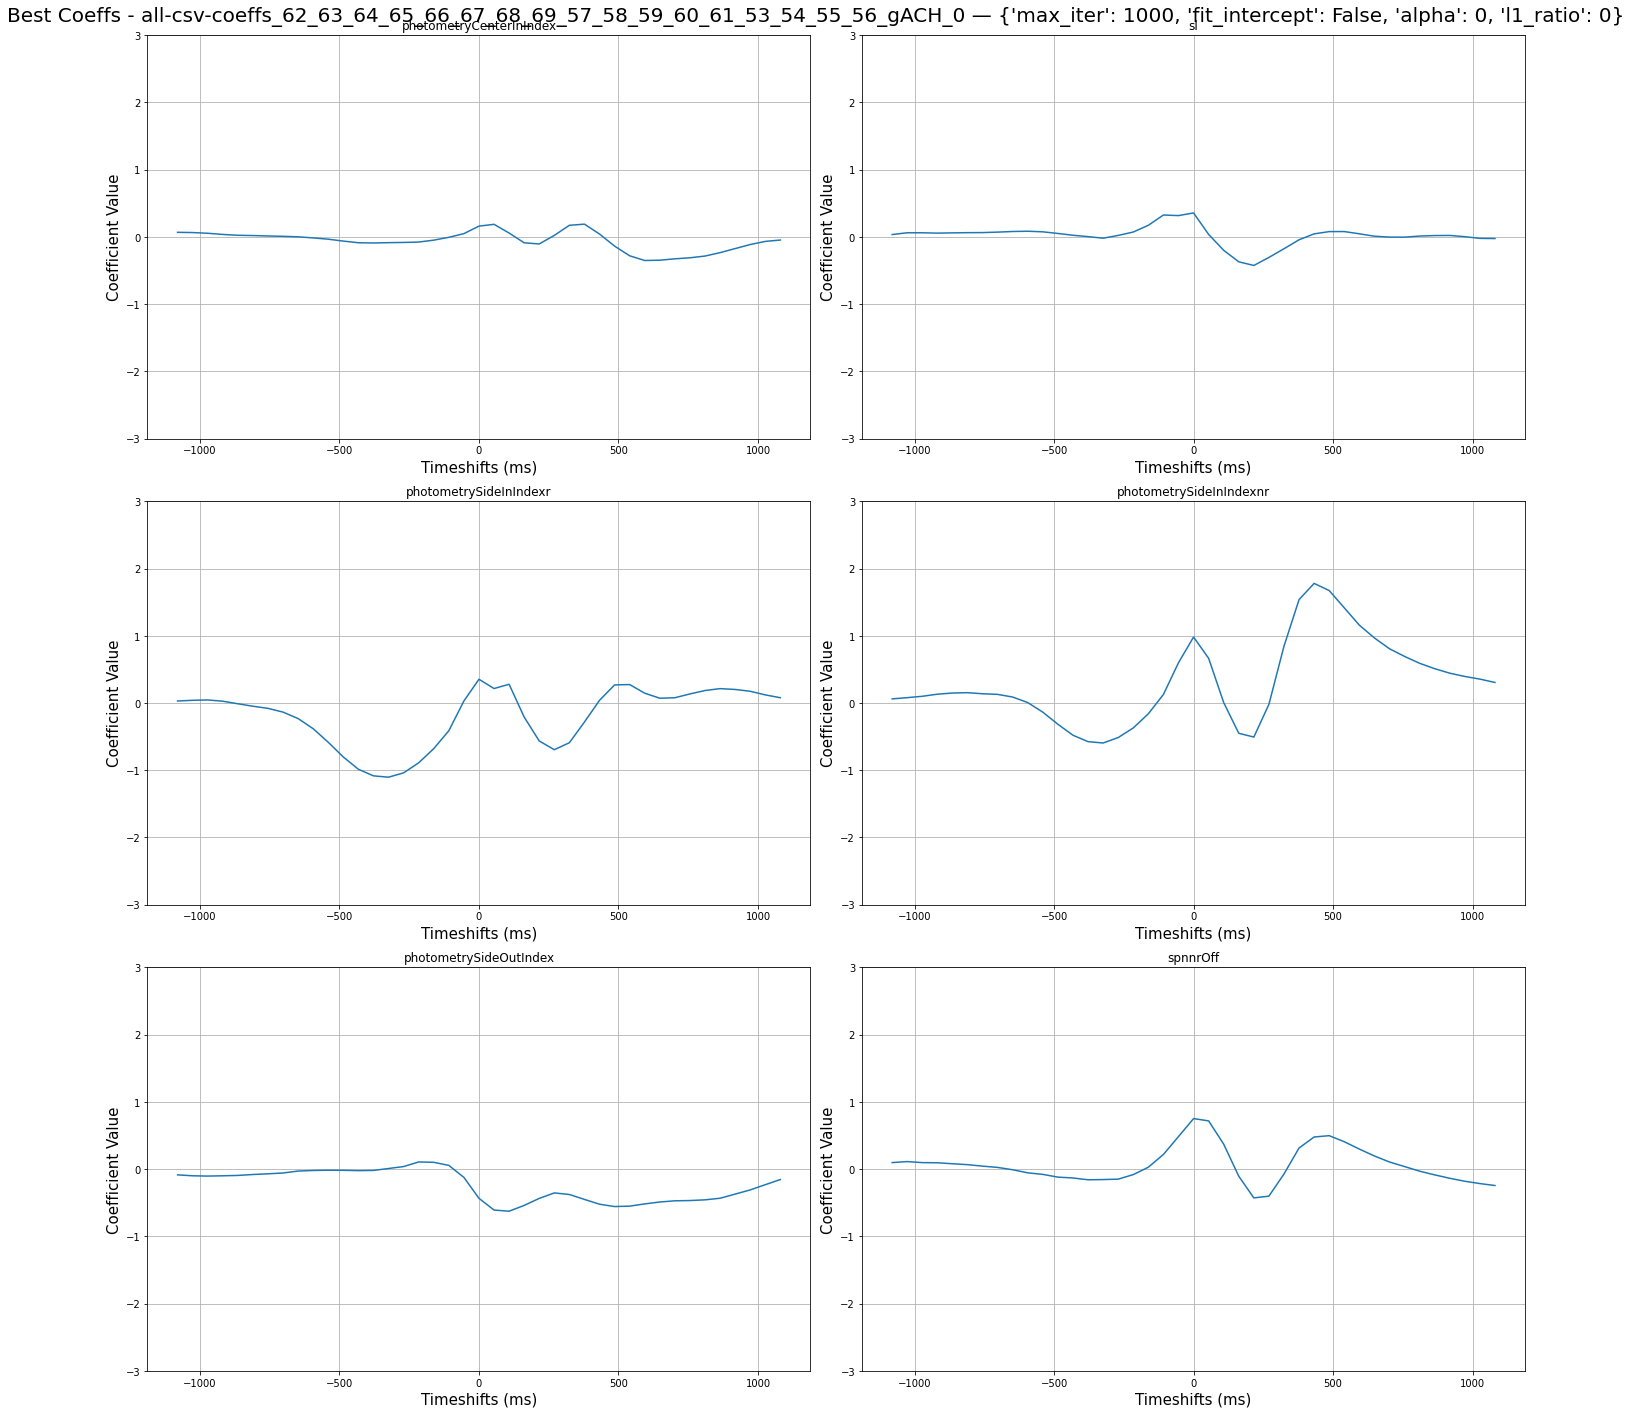

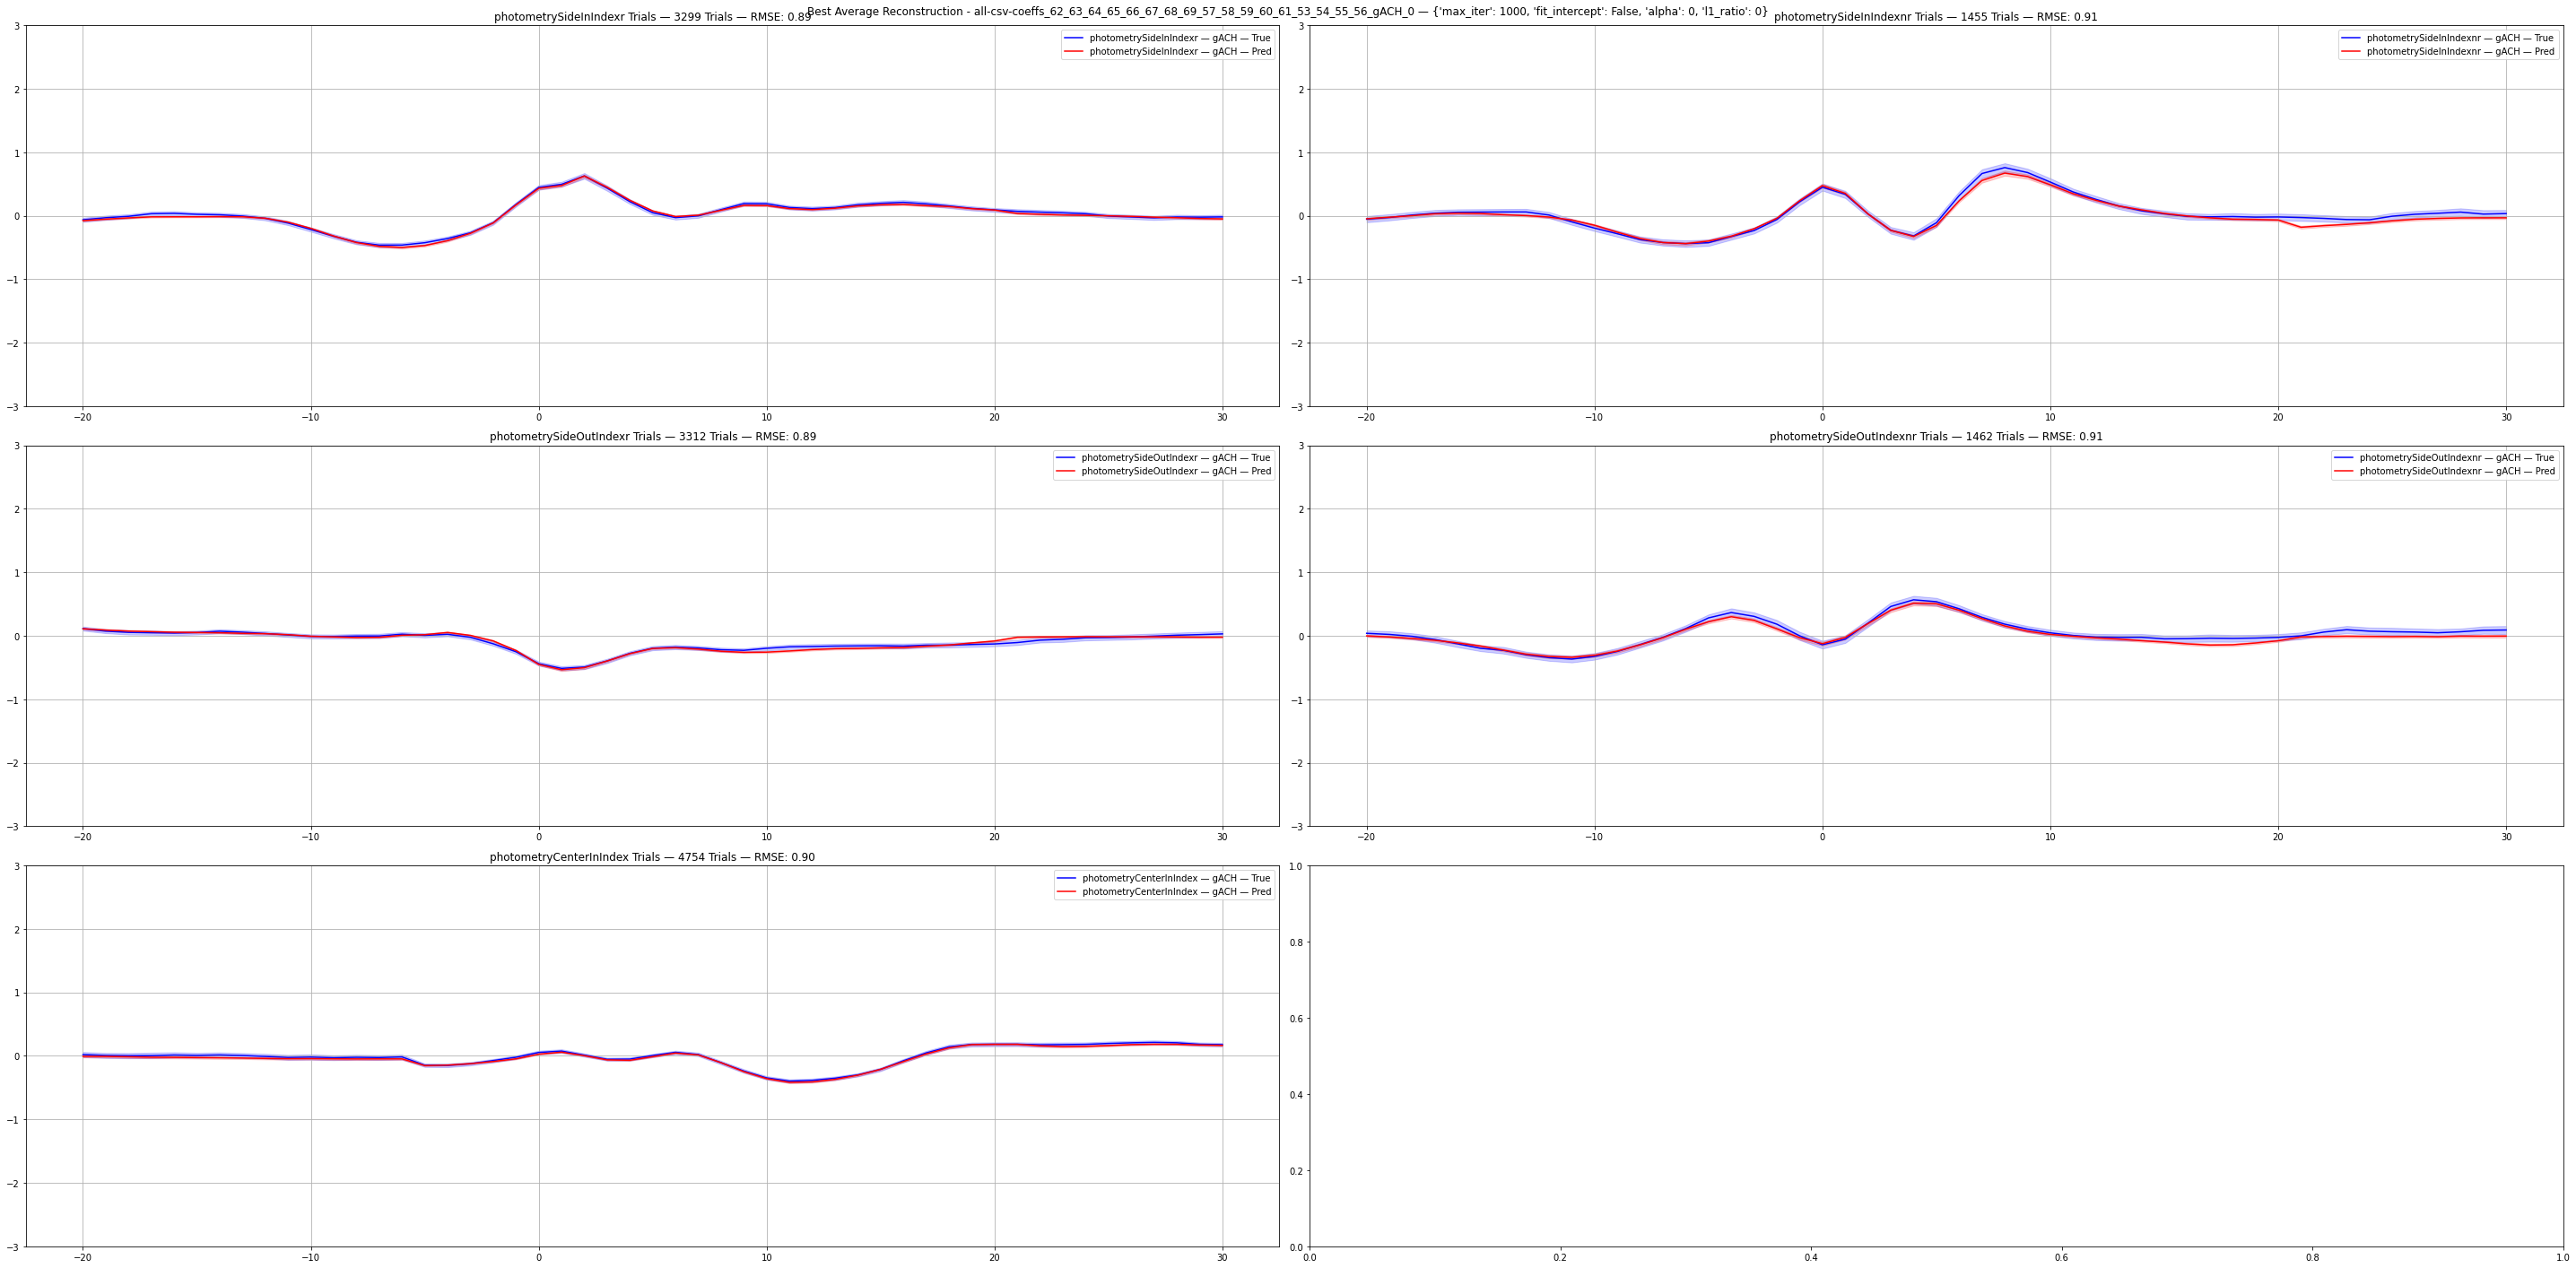

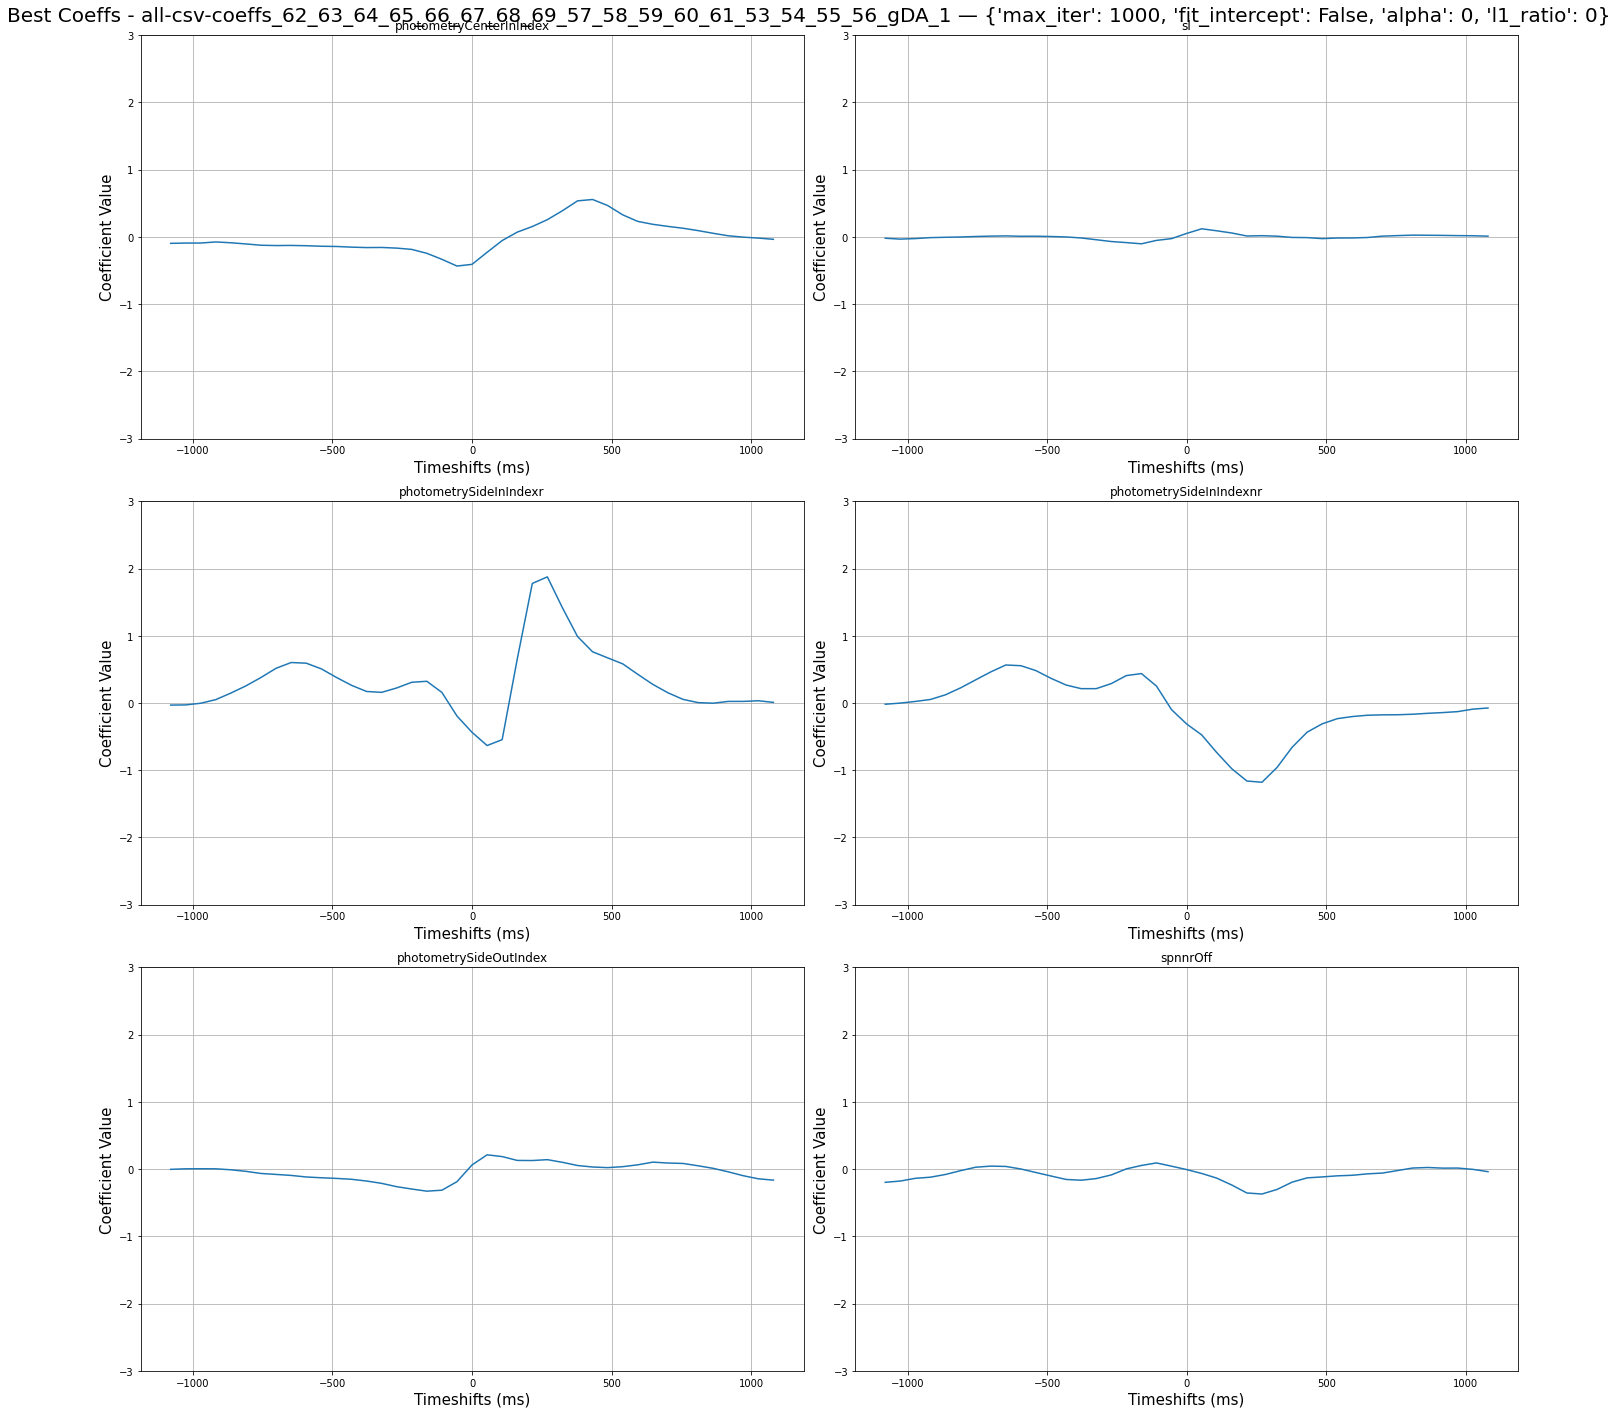

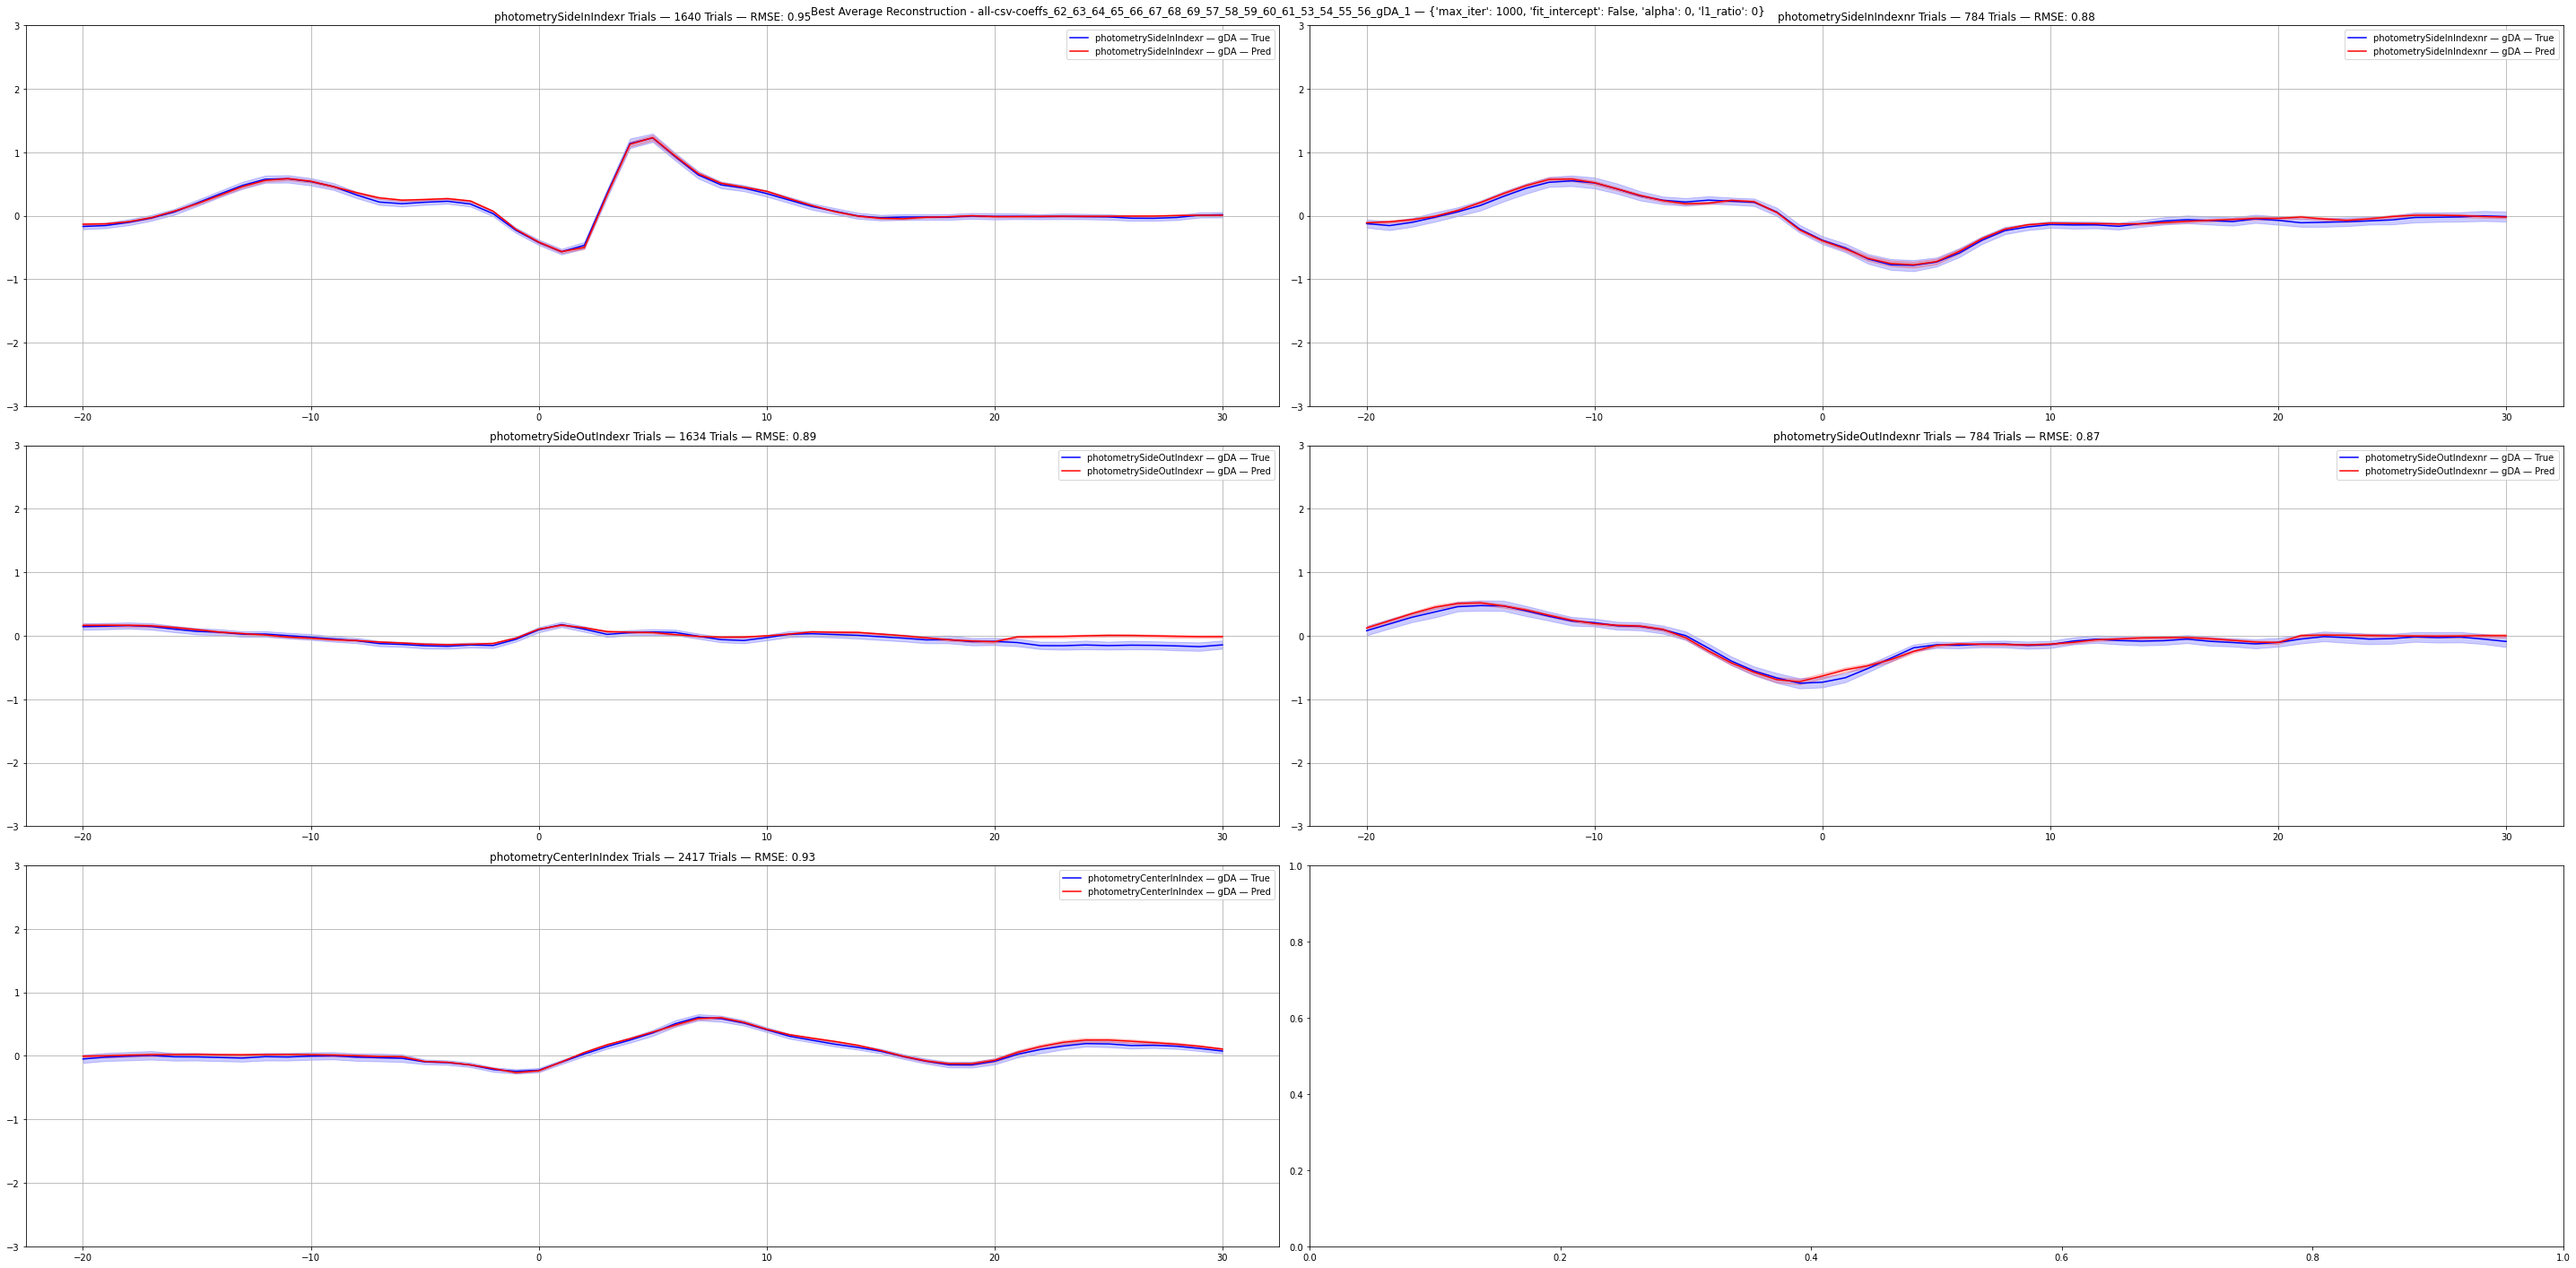

In [29]:
start = time.time()

results_dict = {}

for file_num in range(len(combo_dfs)):


    # Load Table Data
    signal_df = combo_dfs[file_num].copy()
    signal_fn = combo_fns[file_num]

    dfrel_basis = signal_df

    signal_filename_out = 'FINAL_' + signal_fn.split('/')[-1].replace('GLM_SIGNALS_INTERIM_', '').replace('txt', 'csv') + '.csv'
    print(signal_filename_out)
    
    for iXyd, X_y_dct in enumerate(X_y_pairings):
        dfrel = dfrel_basis.copy()

        X_cols_basis = X_y_dct['X_cols']
        y_col = X_y_dct['y_col']
        fn = signal_fn.split('.')[0].split('/')[-1]
        run_id = f'{prefix}_{fn}_{y_col}_{iXyd}'

        X_cols_sftd_basis = bf.col_shift_bounds_dict_to_col_list(X_cols_basis, X_cols_sftd)

        #### Revise line to reduce length / number of checks
        dfrel = dfrel[(dfrel[drop_cols_basis + X_cols_sftd_basis + [y_col]].isna().sum(axis=1) == 0)&(dfrel[y_col] != 0)]
        
        if dfrel.shape[0] == 0:
            print(f'No datapoints found for non-NaN dropcols & non-zero ycols for run id: {run_id}.')
            continue

        print(f'> Included animals for y_col {y_col}:', list(dfrel['file_num'].unique()))
        

        dfrel_setup, dfrel_holdout = models.split_data.holdout_splits(dfrel, id_cols=['nTrial'], perc_holdout=pholdout)
        dfrel_setup, dfrel_holdout = dfrel_setup.copy(), dfrel_holdout.copy()

        # Generate cross-validation (technically, group / shuffle split) sets for training / model selection
        kfold_cv_idx = models.split_data.cv_idx_by_trial_id(dfrel_setup, trial_id_columns=['nTrial'], num_folds=folds, test_size=pgss)

        prediction_X_cols = [_ for _ in X_cols_basis if _ not in ['nTrial']]
        prediction_X_cols_sftd = [_ for _ in X_cols_sftd_basis if _ not in ['nTrial']]
        
        X_setup, y_setup, X_setup_noiti, y_setup_noiti = train_model.get_xy_all_noniti(dfrel_setup, prediction_X_cols_sftd, y_col, noniticol='wi_trial_keep')
        X_holdout_witi, y_holdout_witi, X_holdout_noiti, y_holdout_noiti = train_model.get_xy_all_noniti(dfrel_holdout, prediction_X_cols_sftd, y_col, noniticol='wi_trial_keep')

        print('X_setup.columns:', X_setup.columns)

        best_score, best_score_std, best_params, best_model, cv_results = models.sglm_cv.simple_cv_fit(X_setup, y_setup, kfold_cv_idx, glm_kwarg_lst, model_type='Normal', verbose=0, score_method=score_method)        
        
        
        
        
        
        
        
        eval.print_best_model_info(X_setup, best_score, best_params, best_model, start)
        glm, holdout_score, holdout_neg_mse_score = eval.training_fit_holdout_score(X_setup, y_setup, X_holdout_noiti, y_holdout_noiti, best_params)


        dfrel['pred'] = glm.predict(dfrel[prediction_X_cols_sftd])
        dfrel_setup['pred'] = glm.predict(dfrel_setup[prediction_X_cols_sftd])
        dfrel_holdout['pred'] = glm.predict(dfrel_holdout[prediction_X_cols_sftd])

        # Collect
        results_dict[f'{run_id}'] = {'holdout_score':holdout_score,
                                    'holdout_neg_mse_score':holdout_neg_mse_score,
                                    'best_score':best_score,
                                    'best_params':best_params,
                                    'all_models':sorted([(_['cv_R2_score'],
                                                            _['cv_mse_score'],
                                                            eval.calc_l1(_['cv_coefs']),
                                                            eval.calc_l2(_['cv_coefs']),
                                                            _['glm_kwargs']) for _ in cv_results['full_cv_results']], key=lambda x: -x[0])
                                    }
        print(f'Holdout Score: {holdout_score}')

        # Generate and save plots of the beta coefficients
        X_cols_plot = prediction_X_cols
        X_cols_sftd_plot = prediction_X_cols_sftd
        
        holdout_score_rnd = np.round(holdout_score, 4)
        best_beta_fn = f'{best_coeffs_folder}/{run_id}_best_{all_betas_basename}_R2_{holdout_score_rnd}.png'



        setup_df = pd.DataFrame(np.concatenate([np.array([glm.intercept_]), glm.coef_], axis=0).reshape(1,-1),
                     index=[run_id], columns=['int']+prediction_X_cols_sftd)
        setup_df.to_csv(f'{best_coeffs_npy_folder}/{run_id}_best_coeffs_R2_{holdout_score_rnd}.csv', index=True, header=True)
        all_coeff_dfs.append(setup_df)


        visualize.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                                        X_cols_sftd_plot,
                                        # plot_width=4,
                                        plot_width=2,
                                        y_lims=(-3.0, 3.0),
                                        binsize=54,
                                        filename=best_beta_fn,
                                        plot_name=f'Best Coeffs - {run_id} — {best_params}'
                                        )
        
        best_beta_fn = f'{best_reconstruct_folder}/{run_id}_best_{avg_reconstruct_basename}_R2_{holdout_score_rnd}.png'


        visualize.plot_avg_reconstructions_v2(dfrel_holdout,
                                    alignment_col_lst=[ #'cpn', 'spnr', 'spnnr',
                                                        # 'photometryCenterInIndex', #'photometryCenterOutIndex',
                                                        'photometrySideInIndexr', 'photometrySideInIndexnr',
                                                        'photometrySideOutIndexr', 'photometrySideOutIndexnr',
                                                        'photometryCenterInIndex', #'photometryCenterOutIndex',

                                                        # 'photometrySideInIndexAA', 'photometrySideInIndexAa',
                                                        # 'photometrySideInIndexaA','photometrySideInIndexaa',
                                                        # 'photometrySideInIndexAB', 'photometrySideInIndexAb',
                                                        # 'photometrySideInIndexaB','photometrySideInIndexab',

                                                        # 'photometrySideOutIndexAA', 'photometrySideOutIndexAa',
                                                        # 'photometrySideOutIndexaA', 'photometrySideOutIndexaa',
                                                        # 'photometrySideOutIndexAB', 'photometrySideOutIndexAb',
                                                        # 'photometrySideOutIndexaB', 'photometrySideOutIndexab',
                                                   ],
                                
                                    channel=y_col,
                                    binsize = 54,
                                    # plot_width=4,
                                    plot_width=2,
                                    min_time = -20,
                                    max_time = 30,
                                    min_signal = -3.0,
                                    max_signal = 3.0,
                                    file_name=best_beta_fn,
                                    title=f'Best Average Reconstruction - {run_id} — {best_params}'
                                    )

        # for fitted_model_dict in (cv_results['full_cv_results']):
        #     fitted_model = fitted_model_dict['model']
        #     kwarg_info = "_".join([f"{_k}_{fitted_model_dict['glm_kwargs'][_k]}" for _k in fitted_model_dict["glm_kwargs"]])

        #     model_coef = fitted_model.coef_
        #     model_intercept = fitted_model.intercept_

        #     std_name = f'{run_id}_{kwarg_info}'
        #     np.save(f'{all_models_folder}/coeffs/{std_name}_{model_c_basename}.npy', model_coef)
        #     np.save(f'{all_models_folder}/intercepts/{std_name}_{model_i_basename}.npy', model_intercept)
            
        #     tmp_holdout_score = fitted_model.r2_score(X_holdout_noiti, y_holdout_noiti)
        #     holdout_score_rnd = np.round(tmp_holdout_score, 4)
            

        #     visualize.plot_all_beta_coefs(fitted_model.coef_, X_cols_plot,
        #                                     X_cols_sftd_plot,
        #                                     plot_width=4,
        #                                     y_lims=(-3.0, 3.0),
        #                                     # filename=f'{fn}_coeffs.png',
        #                                     binsize=54,
        #                                     filename=f'{all_coeffs_folder}/{std_name}_{all_betas_basename}_R2_{holdout_score_rnd}.png',
        #                                     plot_name=f'Coeffs by Timeshift - {run_id} — {kwarg_info}'
        #                                     # plot_name=f'{fn} — {y_col} — {kwarg_info}'
        #                                     )


        #     visualize.plot_avg_reconstructions_v2(dfrel_holdout,
        #     # visualize.plot_avg_reconstructions_v2(dfrel,
        #                                     channel=y_col,
        #                                     plot_width=4,
        #                                     binsize = 54,
        #                                     min_time = -20,
        #                                     max_time = 30,
        #                                     min_signal = -2.5,
        #                                     max_signal = 2.5,
        #                                     file_name=f'{all_reconstruct_folder}/{std_name}_{avg_reconstruct_basename}_R2_{holdout_score_rnd}.png',
        #                                     title=f'Average Reconstruction - {run_id} — {kwarg_info}'
        #                                 )

combined_best_coeffs = pd.concat(all_coeff_dfs, axis=0)
combined_best_coeffs.to_csv(f'{best_combined_coeffs_folder}/{prefix}.csv', index=True, header=True)


In [30]:
combined_best_coeffs

,int,photometryCenterInIndex_-20,photometryCenterInIndex_-19,photometryCenterInIndex_-18,photometryCenterInIndex_-17,photometryCenterInIndex_-16,photometryCenterInIndex_-15,photometryCenterInIndex_-14,photometryCenterInIndex_-13,photometryCenterInIndex_-12,...,spnnrOff_11,spnnrOff_12,spnnrOff_13,spnnrOff_14,spnnrOff_15,spnnrOff_16,spnnrOff_17,spnnrOff_18,spnnrOff_19,spnnrOff_20
all-csv-coeffs_62_63_64_65_66_67_68_69_57_58_59_60_61_53_54_55_56_gACH_0,0.0,0.067774,0.063977,0.053427,0.036164,0.023612,0.019628,0.013063,0.008251,0.000470,...,0.298347,0.195814,0.106417,0.038375,-0.030269,-0.085356,-0.136091,-0.180382,-0.214821,-0.243788
all-csv-coeffs_62_63_64_65_66_67_68_69_57_58_59_60_61_53_54_55_56_gDA_1,0.0,-0.096298,-0.092279,-0.091567,-0.075595,-0.087802,-0.105366,-0.124612,-0.129189,-0.127438,...,-0.091312,-0.070165,-0.058352,-0.020958,0.016461,0.024305,0.014776,0.015839,-0.003511,-0.037789


In [77]:
combined_best_coeffs_all2 = combined_best_coeffs.copy()

base
int                        AxesSubplot(0.125,0.125;0.775x0.755)
photometryCenterInIndex    AxesSubplot(0.125,0.125;0.775x0.755)
photometrySideInIndexnr    AxesSubplot(0.125,0.125;0.775x0.755)
photometrySideInIndexr     AxesSubplot(0.125,0.125;0.775x0.755)
photometrySideOutIndex     AxesSubplot(0.125,0.125;0.775x0.755)
sl                         AxesSubplot(0.125,0.125;0.775x0.755)
spnnrOff                   AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

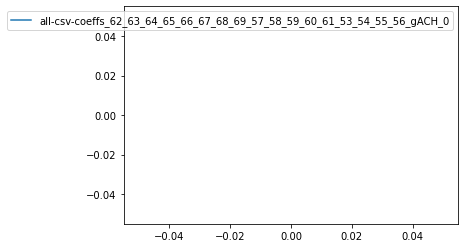

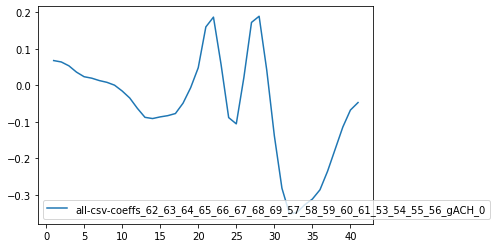

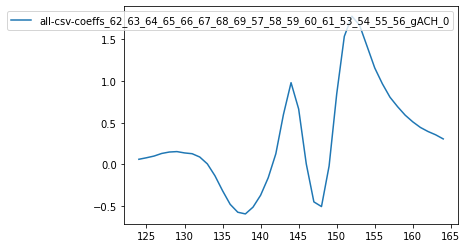

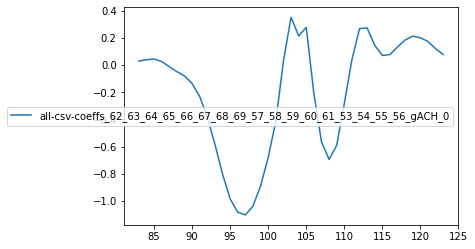

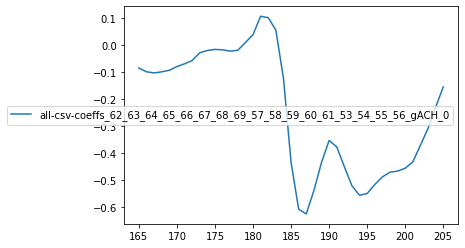

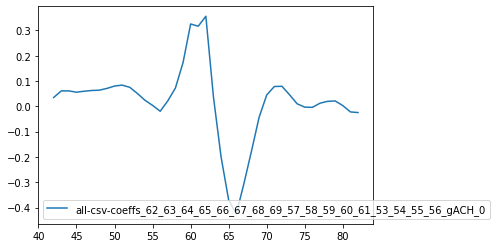

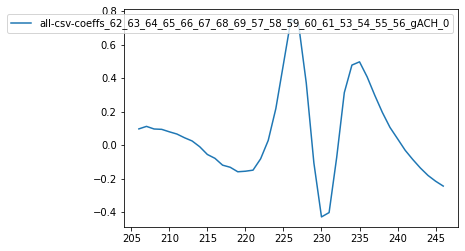

In [78]:
combined_best_coeffs_all_ = combined_best_coeffs_all2.copy().iloc[0:1,:].T.reset_index()
# combined_best_coeffs_by_mouse_.reset_index()['index'].str.split('_').apply(lambda x: x[0])
combined_best_coeffs_all_['base'] = combined_best_coeffs_all_.reset_index()['index'].str.split('_').apply(lambda x: x[0])
combined_best_coeffs_all_.groupby('base').plot()


In [31]:
combined_best_coeffs_by_mouse

,int,photometryCenterInIndex_-20,photometryCenterInIndex_-19,photometryCenterInIndex_-18,photometryCenterInIndex_-17,photometryCenterInIndex_-16,photometryCenterInIndex_-15,photometryCenterInIndex_-14,photometryCenterInIndex_-13,photometryCenterInIndex_-12,...,spnnrOff_11,spnnrOff_12,spnnrOff_13,spnnrOff_14,spnnrOff_15,spnnrOff_16,spnnrOff_17,spnnrOff_18,spnnrOff_19,spnnrOff_20
by_mouse-csv-coeffs_WT62_gDA_1,0.0,-0.002435,0.032156,0.037430,0.068417,0.073962,0.099438,0.108517,0.081251,0.048887,...,-0.071319,-0.063099,-0.054756,-0.033726,-0.035475,-0.031135,-0.033635,-0.024477,-0.036104,-0.060817
by_mouse-csv-coeffs_WT63_gACH_0,0.0,0.025839,0.075376,0.095636,0.107437,0.120470,0.136152,0.122468,0.152403,0.190505,...,0.305536,0.281171,0.230663,0.133369,0.089523,-0.067704,-0.186989,-0.203117,-0.222935,-0.222197
by_mouse-csv-coeffs_WT63_gDA_1,0.0,-0.181759,-0.179402,-0.173625,-0.172666,-0.155066,-0.147817,-0.178430,-0.193349,-0.203974,...,-0.251932,-0.203044,-0.171151,-0.139886,-0.035234,0.028952,0.008953,0.049431,0.037911,-0.037899
by_mouse-csv-coeffs_WT64_gACH_0,0.0,0.151225,0.138312,0.100281,0.084410,0.089104,0.082268,0.116418,0.151752,0.178324,...,0.448184,0.289247,0.110722,-0.042810,-0.191160,-0.272709,-0.249485,-0.248104,-0.220281,-0.263275
by_mouse-csv-coeffs_WT64_gDA_1,0.0,-0.153514,-0.143768,-0.166763,-0.149310,-0.191992,-0.211503,-0.223854,-0.186058,-0.175642,...,-0.227504,-0.214720,-0.143868,-0.104423,-0.085934,-0.068723,-0.039521,-0.033973,-0.044252,-0.073055
by_mouse-csv-coeffs_WT65_gACH_0,0.0,0.112529,0.106037,0.131992,0.164345,0.154216,0.136796,0.104796,0.087951,0.145843,...,0.180255,0.100980,0.075514,0.081231,0.018474,0.000701,-0.034008,-0.121034,-0.138463,-0.205896
by_mouse-csv-coeffs_WT65_gDA_1,0.0,-0.177247,-0.184451,-0.181034,-0.165926,-0.158858,-0.171579,-0.206941,-0.208718,-0.215402,...,-0.200787,-0.188741,-0.141921,-0.084744,-0.085353,-0.065413,-0.059385,-0.048364,-0.059622,-0.085777
by_mouse-csv-coeffs_WT66_gDA_1,0.0,-0.115519,-0.128461,-0.126695,-0.104472,-0.088133,-0.104569,-0.115921,-0.126049,-0.133082,...,-0.177734,-0.115812,-0.070192,-0.063322,-0.073326,-0.035759,-0.036190,-0.020088,-0.001789,-0.014145
by_mouse-csv-coeffs_WT67_gDA_1,0.0,-0.120459,-0.112363,-0.115667,-0.124320,-0.141910,-0.167857,-0.166223,-0.124889,-0.163258,...,-0.108947,-0.141687,-0.143414,-0.074409,-0.076439,0.007118,-0.055522,0.017244,0.021594,-0.019790
by_mouse-csv-coeffs_WT68_gDA_1,0.0,-0.044713,0.012675,0.031291,0.055718,0.023073,0.011070,-0.028904,-0.067074,-0.038990,...,-0.053252,-0.072111,-0.099556,-0.045635,-0.016646,-0.035079,-0.026215,-0.019840,-0.089015,-0.110208


In [69]:
combined_best_coeffs_by_mouse_ = combined_best_coeffs_by_mouse.copy().iloc[0:1,:].T.reset_index()
# combined_best_coeffs_by_mouse_.reset_index()['index'].str.split('_').apply(lambda x: x[0])
combined_best_coeffs_by_mouse_['base'] = combined_best_coeffs_by_mouse_.reset_index()['index'].str.split('_').apply(lambda x: x[0])
combined_best_coeffs_by_mouse_.groupby('base').plot()


In [ ]:
combo_dfs[0]

In [ ]:
combo_dfs[combo_dfs[0]['file_num'].unique()]

In [ ]:
dfrel['file_num'].unique()

In [ ]:
dfrel[dfrel['file_num'] == 34]

In [ ]:
combo_dfs[0][combo_dfs[0]['file_num'] == 34]

In [ ]:
display([_.split('_')[-2:] for _ in signal_files][40:])

In [ ]:
combo_dfs[0]['file_num']

In [ ]:
dfrel2 = combo_dfs[0].reset_index().copy()

In [ ]:
dfrel2['spxrOff'].sum(), dfrel2['spxrOff'].idxmax()

In [ ]:
dfrel2

In [ ]:
with pd.option_context('max_columns', 1000):
    display(dfrel2.loc[1320:1360][['index', 'gACH', 'rDA', 'Ch5', 'Ch6', 'GP_1', 'GP_2', 'GP_5', 'GP_6',
                                   'SGP_1', 'SGP_2', 'SGP_5', 'SGP_6', 'cpo', 'cpn', 'cpx',
                                   'rpo', 'rpn', 'rpx', 'rl', 'lpo', 'lpn', 'lpx', 'll',
                                   'r', 'nr', 'photometryCenterInIndex', 'photometryCenterInIndexr', 'photometryCenterInIndexnr', 'photometryCenterOutIndex', 'photometryCenterOutIndexr', 'photometryCenterOutIndexnr', 'photometrySideInIndex', 'photometrySideInIndexr', 'photometrySideInIndexnr', 'photometrySideInIndexAA', 'photometrySideInIndexAa', 'photometrySideInIndexaA', 'photometrySideInIndexaa', 'photometrySideInIndexAB', 'photometrySideInIndexAb', 'photometrySideInIndexaB', 'photometrySideInIndexab', 'photometrySideOutIndex', 'photometrySideOutIndexr', 'photometrySideOutIndexnr', 'photometrySideOutIndexAA', 'photometrySideOutIndexAa', 'photometrySideOutIndexaA', 'photometrySideOutIndexaa', 'photometrySideOutIndexAB', 'photometrySideOutIndexAb', 'photometrySideOutIndexaB', 'photometrySideOutIndexab', 'photometryFirstLickIndex', 'photometryFirstLickIndexr', 'photometryFirstLickIndexnr', 'nTrial', 'nEndTrial', 'wi_trial_keep', 'gACH.1', 'rDA.1', 'gDA', 'r_trial', 'nr_trial', 'rpxr', 'rpxnr', 'lpxr', 'lpxnr', 'rpnr', 'rpnnr', 'lpnr', 'lpnnr', 'spn', 'spx', 'spnr', 'spnnr', 'spxr', 'spxnr', 'sl', 'spnrOff', 'spnnrOff', 'spxrOff', 'spxnrOff', 'file_num']])

In [ ]:
# print(list(dfrel2.columns))

In [ ]:
# dfrel.to_csv(signal_path_out)

In [ ]:
# Select predictors X
# Select response y
# Timeshift X
# Drop all drop_cols_basis nans, shifted x col nans, y col nans, and y columns without information (i.e. 0s)
# 
# 
# 




In [ ]:
dfrel, X_cols_sftd = lpp.timeshift_vals(dfrel, X_cols, neg_order=neg_order, pos_order=pos_order)

dfrel = dfrel[(dfrel[drop_cols_basis + X_cols_sftd + [y_col]].isna().sum(axis=1) == 0)&(dfrel[y_col] != 0)]
# dfrel = dfrel.dropna()
dfrel_setup, dfrel_holdout = holdout_splits(dfrel,
                                            id_cols=['nTrial'],
                                            perc_holdout=pholdout)
dfrel_setup, dfrel_holdout = dfrel_setup.copy(), dfrel_holdout.copy()

# Generate cross-validation (technically, group / shuffle split) sets for training / model selection
kfold_cv_idx = sglm_ez.cv_idx_by_trial_id(dfrel_setup,
                                        trial_id_columns=['nTrial'],
                                        num_folds=folds,
                                        test_size=pgss)

prediction_X_cols = [_ for _ in X_cols if _ not in ['nTrial']]
prediction_X_cols_sftd = [_ for _ in X_cols_sftd if _ not in ['nTrial']]

X_setup = get_x(dfrel_setup, prediction_X_cols_sftd, keep_rows=None)
y_setup = get_y(dfrel_setup, y_col, keep_rows=None)
X_setup_noiti = get_x(dfrel_setup, prediction_X_cols_sftd, keep_rows=dfrel_setup['wi_trial_keep'])
y_setup_noiti = get_y(dfrel_setup, y_col, keep_rows=dfrel_setup['wi_trial_keep'])
best_score, best_score_std, best_params, best_model, cv_results = sglm_ez.simple_cv_fit(X_setup, y_setup, kfold_cv_idx, glm_kwarg_lst, model_type='Normal', verbose=0, score_method=score_method)

sglm_ez.print_best_model_info(X_setup, best_score, best_params, best_model, start)

X_holdout_witi = get_x(dfrel_holdout, prediction_X_cols_sftd, keep_rows=None)
y_holdout_witi = get_y(dfrel_holdout, y_col, keep_rows=None)
X_holdout_noiti = get_x(dfrel_holdout, prediction_X_cols_sftd, keep_rows=dfrel_holdout['wi_trial_keep'])
y_holdout_noiti = get_y(dfrel_holdout, y_col, keep_rows=dfrel_holdout['wi_trial_keep'])
glm, holdout_score, holdout_neg_mse_score = sglm_ez.training_fit_holdout_score(X_setup, y_setup, X_holdout_noiti, y_holdout_noiti, best_params)

dfrel['pred'] = glm.predict(dfrel[prediction_X_cols_sftd])
dfrel_setup['pred'] = glm.predict(dfrel_setup[prediction_X_cols_sftd])
dfrel_holdout['pred'] = glm.predict(dfrel_holdout[prediction_X_cols_sftd])

# Collect
results_dict[f'{run_id}'] = {'holdout_score':holdout_score,
                            'holdout_neg_mse_score':holdout_neg_mse_score,
                            'best_score':best_score,
                            'best_params':best_params,
                            'all_models':sorted([(_['cv_R2_score'],
                                                    _['cv_mse_score'],
                                                    sglm_ez.calc_l1(_['cv_coefs']),
                                                    sglm_ez.calc_l2(_['cv_coefs']),
                                                    _['glm_kwargs']) for _ in cv_results['full_cv_results']], key=lambda x: -x[0])
                            }
print(f'Holdout Score: {holdout_score}')

# Generate and save plots of the beta coefficients
X_cols_plot = prediction_X_cols
X_cols_sftd_plot = prediction_X_cols_sftd

holdout_score_rnd = np.round(holdout_score, 4)
best_beta_fn = f'{best_coeffs_folder}/{run_id}_best_{all_betas_basename}_R2_{holdout_score_rnd}.png'
visualize.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                                X_cols_sftd_plot,
                                plot_width=4,
                                # plot_width=2,
                                y_lims=(-2.5, 2.5),
                                # filename=f'{fn}_coeffs.png',
                                binsize=54,
                                filename=best_beta_fn,
                                plot_name=f'Best Coeffs - {run_id} — {best_params}'
                                )

best_beta_fn = f'{best_reconstruct_folder}/{run_id}_best_{avg_reconstruct_basename}_R2_{holdout_score_rnd}.png'


visualize.plot_avg_reconstructions_v2(dfrel_holdout,
# visualize.plot_avg_reconstructions_v2(dfrel,
                            channel=y_col,
                            binsize = 54,
                            plot_width=4,
                            min_time = -20,
                            max_time = 30,
                            min_signal = -3.0,
                            max_signal = 3.0,
                            file_name=best_beta_fn,
                            title=f'Best Average Reconstruction - {run_id} — {best_params}'
                            )

for fitted_model_dict in (cv_results['full_cv_results']):

In [ ]:

if len(leave_one_out_list) > 1:
    run_id = f'{prefix}_{fn}_{y_col}_drop={"_".join(left_out)}'
else:
    run_id = f'{prefix}_{fn}_{y_col}'

print("Run ID:", run_id)
dfrel = df.copy()


In [ ]:
X_cols_all = [
    'nTrial',
    'cpn', 'cpx',

    'spnr',
    'spxr',
    'spnnr',
    'spxnr',


    # 'photometrySideInIndexAA', 'photometrySideInIndexAa',
    # 'photometrySideInIndexaA', 'photometrySideInIndexaa',
    # 'photometrySideInIndexAB', 'photometrySideInIndexAb',
    # 'photometrySideInIndexaB', 'photometrySideInIndexab',

    # 'photometrySideOutIndexAA', 'photometrySideOutIndexAa',
    # 'photometrySideOutIndexaA', 'photometrySideOutIndexaa',
    # 'photometrySideOutIndexAB', 'photometrySideOutIndexAb',
    # 'photometrySideOutIndexaB', 'photometrySideOutIndexab',

    'sl',
]


y_col_lst_all = ['gACH', 'rDA', 'gDA', 'Ch5', 'Ch6', 'GP_1', 'GP_2', 'GP_5', 'GP_6', 'SGP_1', 'SGP_2', 'SGP_5', 'SGP_6']

# y_col_lst = ['Ch1', 'Ch2', 'Ch5', 'Ch6']
# y_col_lst = ['gACH', 'gDA', 'rDA', 'Ch5', 'Ch6']
y_col_lst = ['gACH', 'gDA', 'Ch5', 'Ch6']
# y_col_lst = ['Ch5', 'Ch6']

# Select column names to use for GLM predictors
drop_cols_basis = [
    'nTrial',
    'cpn', 'cpx',

    # 'spnr',
    # 'spxr',
    'spnnr',
    'spxnr',
    # 'sl',

    # # 'nTrial',
    # 'photometryCenterInIndex', 'photometryCenterOutIndex',
    # # 'photometrySideInIndex', 'photometrySideOutIndex',
    # 'photometrySideInIndexr', 'photometrySideOutIndexr',
    # 'photometrySideInIndexnr', 'photometrySideOutIndexnr',

    # addl columns
    'spnr', 'spxr',
    # 'spnnr', 'spxnr',


    'photometrySideInIndexAA', 'photometrySideInIndexAa',
    'photometrySideInIndexaA', 'photometrySideInIndexaa',
    'photometrySideInIndexAB', 'photometrySideInIndexAb',
    'photometrySideInIndexaB', 'photometrySideInIndexab',

    'photometrySideOutIndexAA', 'photometrySideOutIndexAa',
    'photometrySideOutIndexaA', 'photometrySideOutIndexaa',
    'photometrySideOutIndexAB', 'photometrySideOutIndexAb',
    'photometrySideOutIndexaB', 'photometrySideOutIndexab',


    'sl',
]


score_method = 'r2'        

# Select hyper parameters for GLM to use for model selection
# Step 1: Create a dictionary of lists for these relevant keywords...
kwargs_iterations = {
    'alpha': [0],
    'l1_ratio': [0],

    # 'alpha': [0.0, 0.001, 0.01, 0.1, 1.0],
    # 'l1_ratio': [0.0, 0.001],
}

# Step 2: Create a dictionary for the fixed keyword arguments that do not require iteration...
kwargs_fixed = {
    'max_iter': 1000,
    'fit_intercept': True
}

# neg_order, pos_order = -14, 14
neg_order, pos_order = -20, 20
folds = 50
pholdout = 0.2
pgss = 0.2

# Step 3: Generate iterable list of keyword sets for possible combinations
glm_kwarg_lst = sglm_cv.generate_mult_params(kwargs_iterations, kwargs_fixed)

results_dict = {}

leave_one_out_list = [[]]
# leave_one_out_list = [[]] + [[_] for _ in X_cols_all if _ != 'nTrial' and _ not in [
#     'photometrySideInIndexAA', 'photometrySideInIndexAa',
#     'photometrySideInIndexaA', 'photometrySideInIndexaa',
#     'photometrySideInIndexAB', 'photometrySideInIndexAb',
#     'photometrySideInIndexaB', 'photometrySideInIndexab',

#     'photometrySideOutIndexAA', 'photometrySideOutIndexAa',
#     'photometrySideOutIndexaA', 'photometrySideOutIndexaa',
#     'photometrySideOutIndexAB', 'photometrySideOutIndexAb',
#     'photometrySideOutIndexaB', 'photometrySideOutIndexab',]] # Excluding column for groupby, 'nTrial'
full_df_set = []


X_cols = [_ for _ in X_cols_all if _ not in left_out]

dfrel, X_cols_sftd = lpp.timeshift_vals(dfrel, X_cols, neg_order=neg_order, pos_order=pos_order)
